# Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Random numbers

In [63]:
np.random.seed(0)
x=2-3*np.random.normal(0,1,20)
y= x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

Dividing dataset into dependent and independent data

In [64]:
x=x[:,np.newaxis]
y=y[:,np.newaxis]

In [65]:
print(type(x))

<class 'numpy.ndarray'>


# Preparing Polynomial Regression model...

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10)
x_poly=poly.fit_transform(x)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression()

Predicting the test data by using Regression model

In [67]:
y_pred=lr.predict(x_poly)

In [68]:
y1=y.ravel()

In [69]:
y_pred1=y_pred.ravel()

Comparing the original and predicted data.....

In [70]:
fdata=pd.DataFrame({"Actual_data":y1,"Predicted_data":y_pred1})
print(fdata.head())

   Actual_data  Predicted_data
0   -53.468412      -53.388679
1    -1.262560       -2.413578
2    -3.506193       -5.114805
3  -107.223200     -107.224680
4   -49.131950      -49.127646


In [71]:
fdata['Error']=fdata["Actual_data"]-fdata["Predicted_data"]
print(fdata.head())

   Actual_data  Predicted_data     Error
0   -53.468412      -53.388679 -0.079733
1    -1.262560       -2.413578  1.151019
2    -3.506193       -5.114805  1.608612
3  -107.223200     -107.224680  0.001479
4   -49.131950      -49.127646 -0.004305


# Performance of the model

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean absolute error : ",mean_absolute_error(y,y_pred))
print("Mean squared error : ",mean_squared_error(y,y_pred))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y,y_pred)))
print("r Square : {:.2f}".format(r2_score(y,y_pred)*100))

Mean absolute error :  1.4894338524292627
Mean squared error :  4.098184944713455
Root mean squared error :  2.0243974275604715
r Square : 99.41


## Visualising the Polynomial regression results

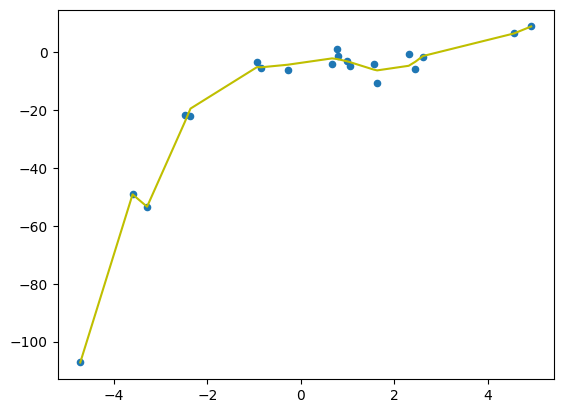

In [73]:
import operator
plt.scatter(x,y,s=20)
sort=operator.itemgetter(0)
sort_a=sorted(zip(x,y_pred),key=sort)
x,y_pred=zip(*sort_a)
plt.plot(x,y_pred,color="y")
plt.show()